In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
# descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# split the data into dependent and independent variables
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train_sc=sc.fit_transform(x_train)

x_test_sc=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression() # build the model

lr.fit(x_train_sc,y_train) # train the model

y_pred=lr.predict(x_test_sc) # predict the model

In [ ]:
y_proba=lr.predict_proba(x_test_sc)
y_proba

array([[0.03504161, 0.96495839],
       [0.84681319, 0.15318681],
       [0.91331926, 0.08668074],
       [0.33903666, 0.66096334],
       [0.88859333, 0.11140667],
       [0.96834278, 0.03165722],
       [0.24397589, 0.75602411],
       [0.13289019, 0.86710981],
       [0.59822076, 0.40177924],
       [0.64066353, 0.35933647],
       [0.41353515, 0.58646485],
       [0.02837049, 0.97162951],
       [0.73776785, 0.26223215],
       [0.83579659, 0.16420341],
       [0.90466206, 0.09533794],
       [0.86239491, 0.13760509],
       [0.12852216, 0.87147784],
       [0.97857363, 0.02142637],
       [0.63173746, 0.36826254],
       [0.75279371, 0.24720629],
       [0.34831753, 0.65168247],
       [0.55168715, 0.44831285],
       [0.92011949, 0.07988051],
       [0.95386565, 0.04613435],
       [0.95393501, 0.04606499],
       [0.65727664, 0.34272336],
       [0.96396556, 0.03603444],
       [0.08315164, 0.91684836],
       [0.90678054, 0.09321946],
       [0.86906048, 0.13093952],
       [0.

In [ ]:
pd.DataFrame({'pred_prob_non_diab': y_proba[:,0], 'pred_prob_diab': y_proba[:,1], 'true': y_test, 'predicted':y_pred})

,pred_prob_non_diab,pred_prob_diab,true,predicted
661,0.035042,0.964958,1,1
122,0.846813,0.153187,0,0
113,0.913319,0.086681,0,0
14,0.339037,0.660963,1,1
529,0.888593,0.111407,0,0
...,...,...,...,...
366,0.757872,0.242128,1,0
301,0.566495,0.433505,1,0
382,0.871405,0.128595,0,0
140,0.831625,0.168375,0,0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# ACCURACY_SCORE
accuracy_score(y_test,y_pred)

0.796875

In [ ]:
# CONFUSION_MATRIX
mat=confusion_matrix(y_test,y_pred)

<Axes: >

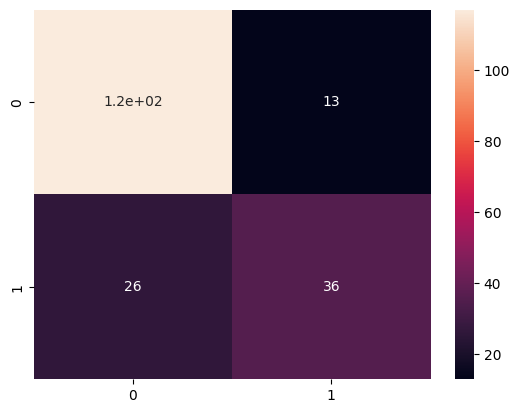

In [ ]:
sns.heatmap(mat,annot=True)

In [ ]:
y_test.value_counts()

,count
Outcome,
0,130
1,62


In [ ]:
# precision

precision_score(y_test,y_pred)


0.7346938775510204

In [ ]:
recall_score(y_test,y_pred)

0.5806451612903226

In [ ]:
f1_score(y_test,y_pred)

0.6486486486486487

In [ ]:
# default_technique
print(confusion_matrix(y_test,y_pred))
print("as_score", accuracy_score(y_test,y_pred))
print("ps_score",precision_score(y_test,y_pred))
print("rs_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

[[117  13]
 [ 26  36]]
as_score 0.796875
ps_score 0.7346938775510204
rs_score 0.5806451612903226
f1_score 0.6486486486486487


In [ ]:
y_proba

array([[0.03504161, 0.96495839],
       [0.84681319, 0.15318681],
       [0.91331926, 0.08668074],
       [0.33903666, 0.66096334],
       [0.88859333, 0.11140667],
       [0.96834278, 0.03165722],
       [0.24397589, 0.75602411],
       [0.13289019, 0.86710981],
       [0.59822076, 0.40177924],
       [0.64066353, 0.35933647],
       [0.41353515, 0.58646485],
       [0.02837049, 0.97162951],
       [0.73776785, 0.26223215],
       [0.83579659, 0.16420341],
       [0.90466206, 0.09533794],
       [0.86239491, 0.13760509],
       [0.12852216, 0.87147784],
       [0.97857363, 0.02142637],
       [0.63173746, 0.36826254],
       [0.75279371, 0.24720629],
       [0.34831753, 0.65168247],
       [0.55168715, 0.44831285],
       [0.92011949, 0.07988051],
       [0.95386565, 0.04613435],
       [0.95393501, 0.04606499],
       [0.65727664, 0.34272336],
       [0.96396556, 0.03603444],
       [0.08315164, 0.91684836],
       [0.90678054, 0.09321946],
       [0.86906048, 0.13093952],
       [0.

In [ ]:
# Technique 1 :- Change Threshold
y_pred_threshold=(y_proba[:,1]>=0.30).astype(int)

print(confusion_matrix(y_test,y_pred_threshold))
print("as_score", accuracy_score(y_test,y_pred_threshold))
print("ps_score",precision_score(y_test,y_pred_threshold))
print("rs_score",recall_score(y_test,y_pred_threshold))
print("f1_score",f1_score(y_test,y_pred_threshold))


[[94 36]
 [11 51]]
as_score 0.7552083333333334
ps_score 0.5862068965517241
rs_score 0.8225806451612904
f1_score 0.6845637583892618


In [ ]:
# technique 2 :- Oversample the minority class
x.shape, y.shape

y.value_counts()/y.shape[0]*100 # imbalance dataset

from imblearn.over_sampling import SMOTE

sm= SMOTE(random_state=42)

x_sm, y_sm=sm.fit_resample(x,y) # balance the dataset

# split the data into train & Test

x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.25,random_state=0)

# scale the data

sc=StandardScaler()

x_train_sm_sc=sc.fit_transform(x_train_sm)

x_test_sm_sc=sc.transform(x_test_sm)


# train the model

lr=LogisticRegression()

lr.fit(x_train_sm_sc,y_train_sm)


y_pred_sm=lr.predict(x_test_sm_sc)


print(confusion_matrix(y_test_sm,y_pred_sm))
print("as_score", accuracy_score(y_test_sm,y_pred_sm))
print("ps_score",precision_score(y_test_sm,y_pred_sm))
print("rs_score",recall_score(y_test_sm,y_pred_sm))
print("f1_score",f1_score(y_test_sm,y_pred_sm))


[[101  25]
 [ 32  92]]
as_score 0.772
ps_score 0.7863247863247863
rs_score 0.7419354838709677
f1_score 0.7634854771784232


In [ ]:
y_train.value_counts()

,count
Outcome,
0,370
1,206


In [ ]:
# technique 3:- Norma Technique (resample only the training dataset)


x_sm_tr, y_sm_tr=sm.fit_resample(x_train_sc,y_train) # balance the dataset


# train the model

lr.fit(x_sm_tr,y_sm_tr)


y_pred_sm=lr.predict(x_test_sc)


print(confusion_matrix(y_test,y_pred_sm))
print("as_score", accuracy_score(y_test,y_pred_sm))
print("ps_score",precision_score(y_test,y_pred_sm))
print("rs_score",recall_score(y_test,y_pred_sm))
print("f1_score",f1_score(y_test,y_pred_sm))

[[104  26]
 [ 20  42]]
as_score 0.7604166666666666
ps_score 0.6176470588235294
rs_score 0.6774193548387096
f1_score 0.6461538461538462


In [ ]:
# technique 4:- Class weights hyperparameter
lr= LogisticRegression(class_weight={0:1, 1:3})

lr.fit(x_train_sc,y_train)


y_pred_cw=lr.predict(x_test_sc)


print(confusion_matrix(y_test,y_pred_cw))
print("as_score", accuracy_score(y_test,y_pred_cw))
print("ps_score",precision_score(y_test,y_pred_cw))
print("rs_score",recall_score(y_test,y_pred_cw))
print("f1_score",f1_score(y_test,y_pred_cw))

[[89 41]
 [ 7 55]]
as_score 0.75
ps_score 0.5729166666666666
rs_score 0.8870967741935484
f1_score 0.6962025316455697


In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




In [ ]:
param_grid={"C":[0.1,1,10,100],
            "penalty":["l1","l2", None],
            "class_weight":[None,{0:1, 1:2.3},{0:1, 1:3}],
            "solver":["lbfgs", "liblinear", "saga"]}

In [ ]:
grid=GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="f1", verbose=3, n_jobs=-1)

In [ ]:
grid.fit(x_train_sc,y_train) # train the model

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, {0: 1, 1: 2.3}, {0: 1, 1: 3}],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'class_weight': {0: 1, 1: 2.3}, 'penalty': None, 'solver': 'lbfgs'}
0.6780853030811181


In [ ]:
model =grid.best_estimator_

In [ ]:
model.fit(x_train_sc,y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 2.3}, penalty=None)

In [ ]:
y_pred_grid=model.predict(x_test_sc)

In [ ]:
print("cnf_mat", confusion_matrix(y_test,y_pred_grid))
print("as_score", accuracy_score(y_test,y_pred_grid))
print("ps_score",precision_score(y_test,y_pred_grid))
print("rs_score",recall_score(y_test,y_pred_grid))
print("f1_score",f1_score(y_test,y_pred_grid))

cnf_mat [[96 34]
 [13 49]]
as_score 0.7552083333333334
ps_score 0.5903614457831325
rs_score 0.7903225806451613
f1_score 0.6758620689655173
